In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('dark_background')

In [138]:
NFA_data =pd.read_csv('Data_for_UCI_named.csv')
NFA_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [139]:
print(NFA_data)

          tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      sta

In [140]:
print(NFA_data.columns)

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')


In [141]:
NFA_data.value_counts().head(10)

tau1      tau2      tau3      tau4      p1        p2         p3         p4         g1        g2        g3        g4        stab       stabf   
0.500793  6.734360  5.284357  5.797771  3.387591  -0.752656  -0.972783  -1.662152  0.802707  0.204237  0.642260  0.513210  -0.014354  stable      1
6.836982  9.666273  7.426696  4.970267  3.361971  -0.576022  -0.825520  -1.960429  0.160843  0.347951  0.591763  0.106057   0.011463  unstable    1
6.830438  8.825121  2.375126  8.957928  4.350904  -1.479915  -1.001004  -1.869985  0.836488  0.055149  0.233569  0.865382   0.045026  unstable    1
6.831522  9.605821  7.707207  6.426386  4.837150  -1.647183  -1.447027  -1.742941  0.511570  0.912095  0.748709  0.906299   0.093022  unstable    1
6.832148  5.013236  5.279009  6.710398  3.063036  -1.254048  -0.749304  -1.059683  0.137511  0.791880  0.936726  0.081260   0.046312  unstable    1
6.832938  8.103769  9.659373  1.107526  4.748096  -0.896783  -1.972358  -1.878956  0.539333  0.731171  0.466057  0.60

In [142]:
NFA_data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [143]:
# checking the value type of data
NFA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [144]:
# checking for missing values
NFA_data.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [145]:
# droppng the stab column
NFA_data = NFA_data.drop(columns=['stab'])
NFA_data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [146]:
#identifying our target variable and inputs variable
input_val = NFA_data.drop(columns=["stabf"])
target_val = NFA_data['stabf']

In [147]:
input_val

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [148]:
target_val

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [149]:
#splitting the data set into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_val, target_val, test_size=0.2, random_state=1)

In [150]:
x_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,9.504984,5.265415,2.029617,8.026334,3.449756,-0.922754,-1.526305,-1.000696,0.191864,0.611297,0.080008,0.350312
7813,8.035818,4.632548,1.177810,1.204950,4.093208,-1.568218,-0.819966,-1.705024,0.223384,0.317770,0.726623,0.441620
905,7.052560,3.264057,1.405949,4.497549,3.741358,-0.629026,-1.407945,-1.704387,0.868306,0.605566,0.100591,0.747320
5192,5.085242,1.790031,2.486392,2.848192,3.159670,-0.892898,-1.025461,-1.241311,0.473917,0.418512,0.326253,0.982488


In [151]:
y_test

9953    unstable
3850    unstable
4962      stable
3886      stable
5437    unstable
          ...   
3919      stable
162       stable
7903      stable
2242    unstable
2745    unstable
Name: stabf, Length: 2000, dtype: object

In [152]:
y_train.value_counts

<bound method IndexOpsMixin.value_counts of 2694    unstable
5140    unstable
2568    unstable
3671    unstable
7427    unstable
          ...   
2895      stable
7813      stable
905     unstable
5192    unstable
235       stable
Name: stabf, Length: 8000, dtype: object>

In [153]:
#identify and sorting out numerical and categorical columns
numeric_cols =x_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols =x_train.select_dtypes('object').columns.tolist()
numeric_cols

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4']

In [130]:
#there seems no categorical columns in the train set data
categorical_cols

[]

In [131]:
!pip install imblearn

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)


In [154]:
#scaling the numerical columns 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_input = scaler.fit_transform(x_train[numeric_cols])
test_input = scaler.fit_transform(x_test[numeric_cols])

In [155]:
train_input=pd.DataFrame(train_input)
train_input 

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.947942,0.501630,0.160952,0.792326,0.436067,0.718167,0.315786,0.666197,0.149332,0.590851,0.031541,0.316121
7996,0.793271,0.434989,0.071276,0.074168,0.586343,0.287753,0.786719,0.196614,0.182514,0.281840,0.712410,0.412244
7997,0.689756,0.290888,0.095294,0.420814,0.504170,0.914034,0.394700,0.197039,0.861431,0.584817,0.053214,0.734067
7998,0.482641,0.135673,0.209040,0.247169,0.368319,0.738076,0.649711,0.505777,0.446253,0.387895,0.290830,0.981638


In [156]:
test_input = pd.DataFrame(test_input)
test_input 


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.671252,0.380399,0.932452,0.821045,0.564170,0.068342,0.272735,0.954297,0.238332,0.837878,0.065357,0.813402
1,0.557835,0.607517,0.445310,0.349373,0.446699,0.193781,0.621643,0.798343,0.028656,0.385619,0.908240,0.854206
2,0.186912,0.408961,0.245059,0.504567,0.312847,0.531895,0.732037,0.712673,0.920588,0.083845,0.688192,0.014302
3,0.475237,0.179987,0.606932,0.008142,0.629601,0.026479,0.616940,0.474739,0.523120,0.016181,0.396978,0.805067
4,0.752304,0.914530,0.524585,0.993143,0.460153,0.497346,0.442973,0.637126,0.538520,0.074806,0.776051,0.263381
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.823453,0.304664,0.101662,0.870227,0.535453,0.267447,0.712685,0.393241,0.639562,0.466683,0.135352,0.129551
1996,0.187240,0.266153,0.797056,0.596805,0.457782,0.597795,0.786107,0.200095,0.774560,0.758461,0.193673,0.184136
1997,0.773700,0.019448,0.023670,0.652923,0.205489,0.958455,0.526551,0.782644,0.142000,0.536689,0.665583,0.881163
1998,0.174987,0.555455,0.431208,0.620956,0.271870,0.712639,0.507950,0.867084,0.940038,0.729906,0.107186,0.268509


In [172]:
#converting categorical data to numeric data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test =encoder.fit_transform(y_test)

In [173]:
target_train = pd.DataFrame(y_train)
target_train 


,0
0,1
1,1
2,1
3,1
4,1
...,...
7995,0
7996,0
7997,1
7998,1


In [174]:
target_test =pd.DataFrame(y_test)
target_test

,0
0,1
1,1
2,0
3,0
4,1
...,...
1995,0
1996,0
1997,0
1998,1


# Decision Tree Classifier

In [176]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_input, target_train) 

DecisionTreeClassifier()

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [184]:
train_preds = dec_tree.predict(test_input)

In [185]:
train_preds

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [169]:
pd.value_counts(train_preds)

1    5092
0    2908
dtype: int64

In [186]:
accuracy_score(train_preds, target_test)

0.859

In [ ]:
dec_tree.score()

In [196]:
precision = precision_score(train_preds ,target_test )
precision

0.8835403726708074

In [197]:
recall = recall_score(train_preds ,target_test)
recall

0.8960629921259843

In [198]:
f1 = f1_score(train_preds ,target_test )
f1

0.8897576231430806

In [38]:
from sklearn.tree import plot_tree, export_text

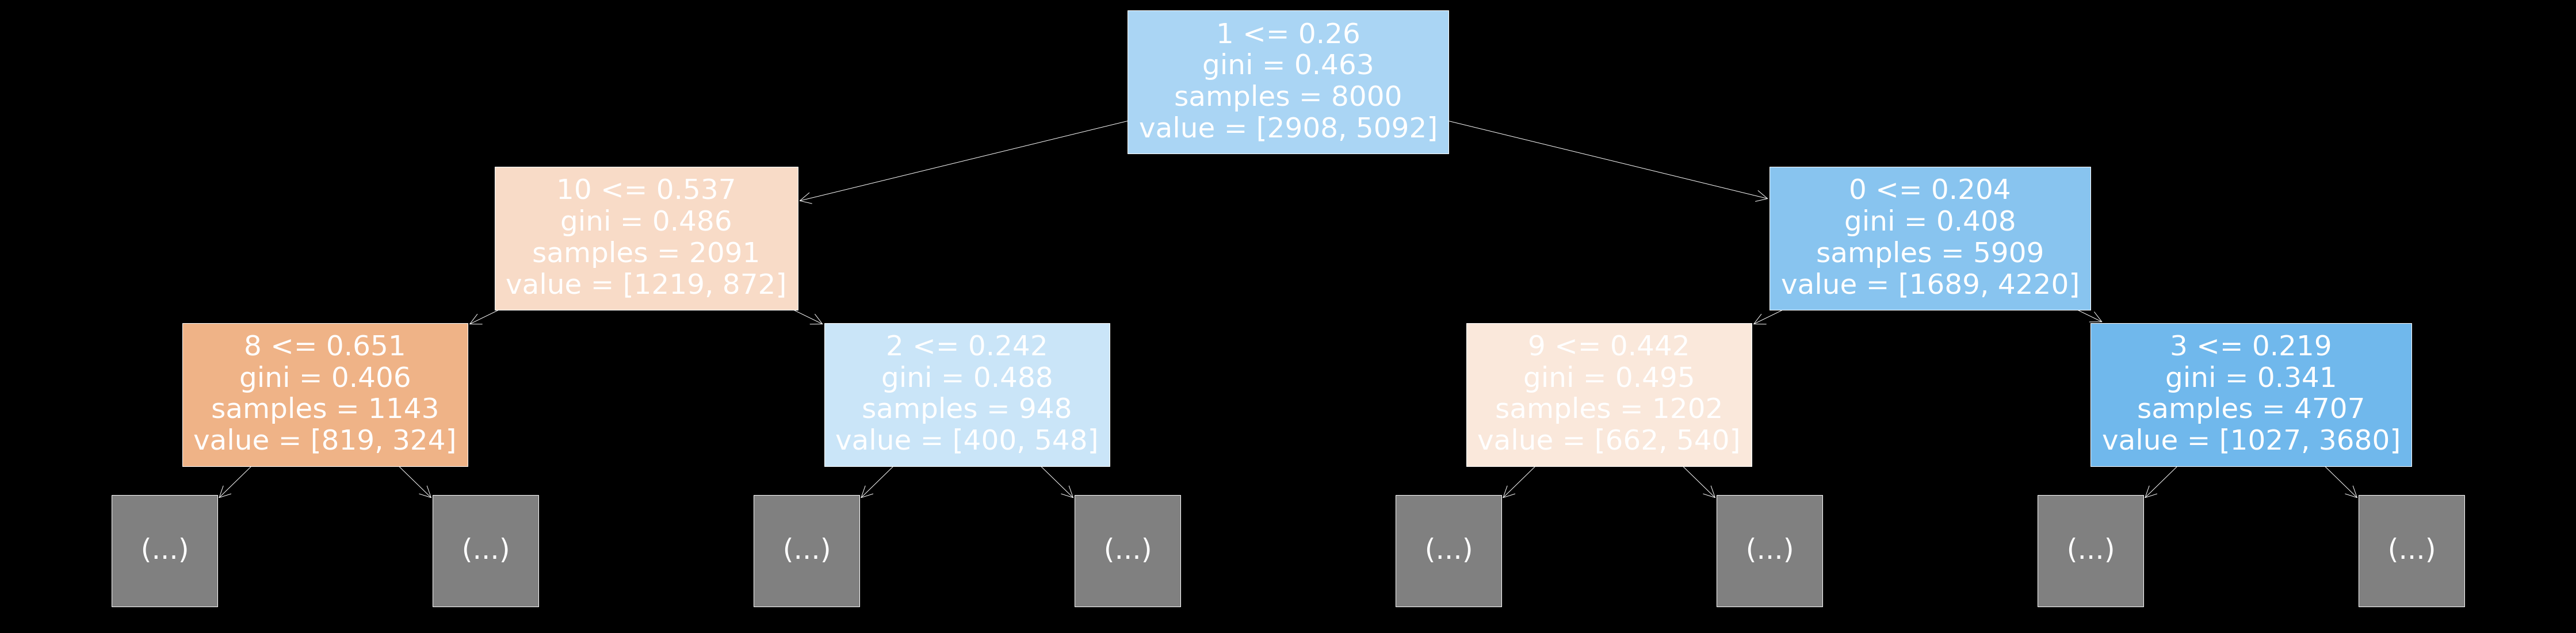

In [40]:
plt.figure(figsize=(80,20))
plot_tree(dec_tree, feature_names=train_input.columns, max_depth=2, filled=True);

In [41]:
dec_tree.feature_importances_

array([0.11809494, 0.11937743, 0.12880145, 0.13704549, 0.01724147,
       0.01751857, 0.02140931, 0.01473379, 0.10957856, 0.10717828,
       0.09741231, 0.1116084 ])

In [42]:
importance_df = pd.DataFrame({
    'feature': train_input.columns,
    'importance': dec_tree.feature_importances_
}).sort_values('importance', ascending=False)

In [43]:
importance_df.head(10)

,feature,importance
3,3,0.137045
2,2,0.128801
1,1,0.119377
0,0,0.118095
11,11,0.111608
8,8,0.109579
9,9,0.107178
10,10,0.097412
6,6,0.021409
5,5,0.017519


In [44]:
train_input

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.605895,0.214898,0.686826,0.945002,0.454782,0.516700,0.874552,0.255448,0.545528,0.598331,0.669360,0.642234
1,0.481097,0.525305,0.797470,0.027436,0.616162,0.479547,0.065178,0.641255,0.414248,0.049680,0.912824,0.083403
2,0.075724,0.874245,0.355155,0.835240,0.474432,0.640493,0.697645,0.252484,0.903588,0.919622,0.198830,0.642306
3,0.736693,0.652439,0.873580,0.171161,0.362461,0.278625,0.940452,0.691134,0.221930,0.893734,0.963154,0.579607
4,0.692014,0.088023,0.589553,0.764197,0.220544,0.718310,0.911640,0.685474,0.983833,0.701163,0.828559,0.121206
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.947942,0.501630,0.160952,0.792326,0.436067,0.718167,0.315786,0.666197,0.149332,0.590851,0.031541,0.316121
7996,0.793271,0.434989,0.071276,0.074168,0.586343,0.287753,0.786719,0.196614,0.182514,0.281840,0.712410,0.412244
7997,0.689756,0.290888,0.095294,0.420814,0.504170,0.914034,0.394700,0.197039,0.861431,0.584817,0.053214,0.734067
7998,0.482641,0.135673,0.209040,0.247169,0.368319,0.738076,0.649711,0.505777,0.446253,0.387895,0.290830,0.981638


# RandomForest classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_jobs=-1, random_state=1)

In [75]:
model.fit(train_input, target_train)

<ipython-input-75-717cd9577472>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_input, target_train)


RandomForestClassifier(n_jobs=-1, random_state=1)

In [188]:
train_preds1 = model.predict(test_input)

In [189]:
train_preds1


array([1, 1, 0, ..., 0, 0, 1])

In [190]:
accuracy_score(train_preds1, target_test)

0.9285

# ExtraTree classifier

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [203]:
?ExtraTreesClassifier

In [205]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(criterion ='gini',  n_jobs = -1, verbose = 1, random_state=1)

# Training the model
extra_tree_forest.fit(train_input, target_train)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)


<ipython-input-205-fc47cccf68aa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_tree_forest.fit(train_input, target_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [206]:
train_preds2 = extra_tree_forest.predict(test_input)
train_preds2

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [207]:
accuracy_score(train_preds2, target_test)

0.9295

In [224]:
extra_tree_forest.score(train_input, target_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


1.0

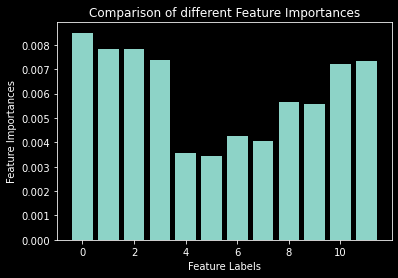

In [53]:
# Plotting a Bar Graph to compare the models
plt.bar(train_input.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()


# performing some hypertuning 

In [138]:
?ExtraTreesClassifier

In [256]:
hyperparameter_grid = dict(n_estimators = [50, 100, 300, 500, 1000],
                            min_samples_split = [2, 3, 5, 7, 9],
                            min_samples_leaf = [1, 2, 4, 6, 8], max_features = ['auto', 'sqrt', 'log2', None])

In [257]:
from sklearn.model_selection import RandomizedSearchCV

In [258]:
r_search = RandomizedSearchCV(estimator =extra_tree_forest, param_distributions = hyperparameter_grid,
                                random_state = 1, cv = 5, n_iter = 10, scoring = 'accuracy',
                                n_jobs = -1, verbose = 1)

In [259]:
def hyperparameter_grid(**params):
    r_search.fit(train_input,target_train)
    return extra_tree_forest.score(train_input,target_train)

In [265]:
r_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

# xgboost

In [84]:
from xgboost import XGBClassifier

In [85]:
xgb = XGBClassifier(random_state=1)

In [87]:
xgb.fit(train_input,target_train)

[09:21:03] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
preds = xgb.predict(test_input)
preds

array([1, 1, 0, ..., 0, 1, 1])

In [192]:
accuracy_score(preds, target_test)

0.9455

# light gradent boosting

In [89]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=1)


In [90]:

lgbm.fit(train_input, target_train)

y_pred = lgbm.predict(test_input)
y_pred

C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, ..., 0, 1, 1])

In [193]:
accuracy_score(y_pred, target_test)

0.94

In [91]:
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(xgb, train_input, target_train, cv= 5 , scoring= 'f1_macro' )
scores_1

C:\Users\Gues\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:21:30] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gues\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:21:30] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gues\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:21:31] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gues\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:21:31] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Gues\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gues\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[09:21:32] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.9366625 , 0.94470459, 0.93293748, 0.93646215, 0.94718274])